In [1]:
import os
import pandas as pd
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [6]:
from newsapi import NewsApiClient

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Read your api key environment variable
from dotenv import load_dotenv
load_dotenv("api_keys.env")

True

In [3]:
# Create a newsapi client
api_key = os.getenv("news_api")

In [7]:
newsapi = NewsApiClient(api_key=api_key)

In [9]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [8]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dave/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
analyzer = SentimentIntensityAnalyzer()

In [15]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []
for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
btc_df = pd.DataFrame(sentiments)
btc_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0258,0.059,0.880,0.061,Just hackers burning up 0day like it’s a fire ...
1,0.0772,0.000,0.962,0.038,Reuters had previously reported the FBI would ...
2,0.0000,0.000,1.000,0.000,Most of these accounts tweeted some variant of...
3,0.5994,0.000,0.851,0.149,Our investigation and cooperation with law enf...
4,0.1280,0.000,0.951,0.049,Image copyrightAFP/REUTERSImage caption\r\n Ki...


In [16]:
# Create the ethereum sentiment scores DataFrame
sentiments = []
for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
eth_df = pd.DataFrame(sentiments)
eth_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.0,1.000,0.000,"Sparrow Exchange, a Bitcoin and Ethereum optio..."
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Cryptocurrency Investment ...
2,0.5574,0.0,0.863,0.137,"Introducing Web3Torrent\r\nJune 18, 2020\r\nTo..."
3,0.2263,0.0,0.947,0.053,"When the inventor of AWS Lambda, Tim Wagner, a..."
4,0.7316,0.0,0.834,0.166,I was perusing the crypto markets today and no...


In [18]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.207505,0.069600,0.900200,0.030150
std,0.386506,0.079904,0.089116,0.040888
min,-0.868900,0.000000,0.687000,0.000000
25%,-0.578775,0.000000,0.848250,0.000000
50%,-0.076550,0.060500,0.916000,0.000000
75%,0.006450,0.109000,0.971500,0.052000
max,0.599400,0.277000,1.000000,0.149000


In [19]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,16.000000,16.000000,16.000000,16.000000
mean,0.293394,0.042125,0.852250,0.105625
std,0.409885,0.048503,0.097511,0.081672
min,-0.451900,0.000000,0.660000,0.000000
25%,0.000000,0.000000,0.802500,0.039750
50%,0.381550,0.024500,0.855000,0.119000
75%,0.647875,0.078250,0.919000,0.170000
max,0.731600,0.130000,1.000000,0.226000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum generated the strongest mean positive score

Q: Which coin had the highest compound score?

A: Ethereum also generated a considerably higher compound score

Q. Which coin had the highest positive score?

A: Ethereum's mean positive score was substantially higher than that of Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [21]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [22]:
from nltk.tokenize import RegexpTokenizer

In [26]:
print(sw)

None


In [37]:
wnl = WordNetLemmatizer()


In [38]:
def tokenizer_1(text):
    """Tokenizes text."""
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    #words = list(filter(lambda w: w.lower(), words))
    words = [word.lower() for word in words]
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stopwords
    sw = set(stopwords.words('english'))
    sw_addons = {"u", "it", "s", "n't", "…", "``", "char", "chars", "''"}
    words = list(filter(lambda t: t.lower() not in sw.union(sw_addons), words))
    # Lemmatize Words into root words
    tokens_1 = [wnl.lemmatize(word) for word in words]
    return tokens_1

In [63]:
tokens_btc = tokenizer_1(btc_df.text.str.cat())

In [64]:
type(tokens_btc)

list

In [15]:
# Create a new tokens column for bitcoin

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0516,0.900,0.036,0.064,Cryptocurrency exchange Binance has resumed tr...,"[Cryptocurrency, exchange, Binance, resumed, t..."
1,0.3818,0.943,0.000,0.057,"Bitcoin is now trading at around $8,130, up a ...","[Bitcoin, trading, around, 8,130, whopping, 60..."
2,-0.2263,0.888,0.065,0.047,Binance has vowed to raise the quality of its ...,"[Binance, vowed, raise, quality, security, aft..."
3,0.3612,0.937,0.000,0.063,A new payment network called Flexa is launchin...,"[new, payment, network, called, Flexa, launchi..."
4,-0.6486,0.897,0.103,0.000,"If you thought that the theft of 7,000 bitcoin...","[thought, theft, 7,000, bitcoins, one, world, ..."


In [16]:
# Create a new tokens column for ethereum

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.3919,0.801,0.140,0.059,President Trump tweeted insults at Twitter aga...,"[President, Trump, tweeted, insult, Twitter, m..."
1,0.1779,0.961,0.000,0.039,After announcing that they were launching a ma...,"[announcing, launching, managed, blockchain, s..."
2,0.0000,1.000,0.000,0.000,Captain Kirk and neo-Dadaists. Repugnant marke...,"[Captain, Kirk, neo-Dadaists, Repugnant, marke..."
3,-0.8020,0.717,0.217,0.066,"So long as cryptocurrency exists, so too will ...","[long, cryptocurrency, exists, extraordinaryle..."
4,-0.6486,0.897,0.103,0.000,"If you thought that the theft of 7,000 bitcoin...","[thought, theft, 7,000, bitcoins, one, world, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [46]:
from collections import Counter
from nltk import ngrams

In [58]:
N = 2
grams = ngrams(tokenizer_1(btc_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('elon', 'musk'), 6),
 (('bill', 'gate'), 4),
 (('barack', 'obama'), 4),
 (('twitter', 'account'), 3),
 (('joe', 'biden'), 3),
 (('send', 'bitcoin'), 2),
 (('kim', 'kardashian'), 2),
 (('kanye', 'west'), 2),
 (('gate', 'barack'), 2),
 (('cryptocurrency', 'scam'), 2),
 (('gate', 'elon'), 2),
 (('obama', 'joe'), 2),
 (('biden', 'elon'), 2),
 (('public', 'figure'), 2),
 (('hacker', 'burning'), 1),
 (('burning', '0day'), 1),
 (('0day', 'like'), 1),
 (('like', '’'), 1),
 (('’', 'fire'), 1),
 (('fire', 'sale'), 1)]

In [59]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer_1(eth_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('bitcoin', 'ethereum'), 3),
 (('market', 'cap'), 2),
 (('paper', 'wallet'), 2),
 (('weird', 'year'), 2),
 (('sparrow', 'exchange'), 1),
 (('exchange', 'bitcoin'), 1),
 (('ethereum', 'option'), 1),
 (('option', 'trading'), 1),
 (('trading', 'platform'), 1),
 (('platform', 'based'), 1),
 (('based', 'singapore'), 1),
 (('singapore', 'announced'), 1),
 (('announced', 'today'), 1),
 (('today', 'raised'), 1),
 (('raised', '3.5'), 1),
 (('3.5', 'million'), 1),
 (('million', 'series'), 1),
 (('series', 'funding'), 1),
 (('funding', 'round'), 1),
 (('round', 'led'), 1)]

In [61]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [66]:
token_count(tokens_btc, N=10)

[('account', 13),
 ('twitter', 12),
 ('bitcoin', 6),
 ('elon', 6),
 ('musk', 6),
 ('investigation', 5),
 ('wednesday', 5),
 ('hacker', 4),
 ('hack', 4),
 ('tweet', 4)]

In [67]:
tokens_eth = tokenizer_1(eth_df.text.str.cat())

In [68]:
token_count(tokens_eth, N=10)

[('bitcoin', 13),
 ('ethereum', 9),
 ('crypto', 7),
 ('wallet', 5),
 ('cryptocurrency', 4),
 ('today', 3),
 ('june', 3),
 ('web3torrent', 3),
 ('market', 3),
 ('based', 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [71]:
def process_text(tokens):
    return ' '.join(tokens)

In [77]:
big_string = ' '.join(tokens_btc)
input_words = process_text(big_string)

# Bitcoin Wordcloud

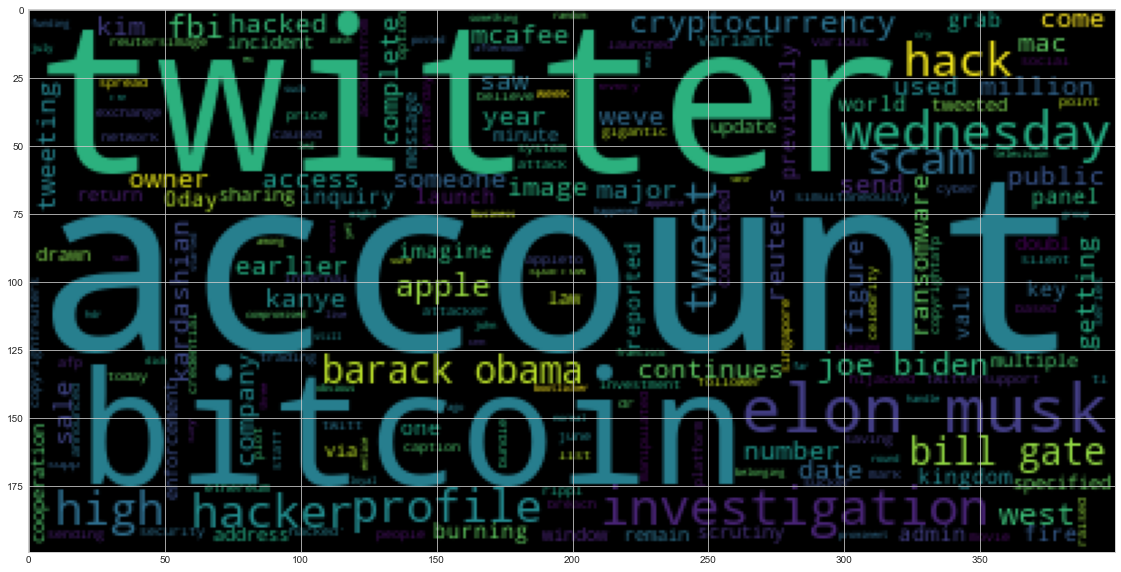

In [78]:
wc = WordCloud().generate(big_string)
plt.imshow(wc)

In [72]:
big_string = ' '.join(tokens_eth)
input_words = process_text(big_string)

# Ethereum Wordcloud

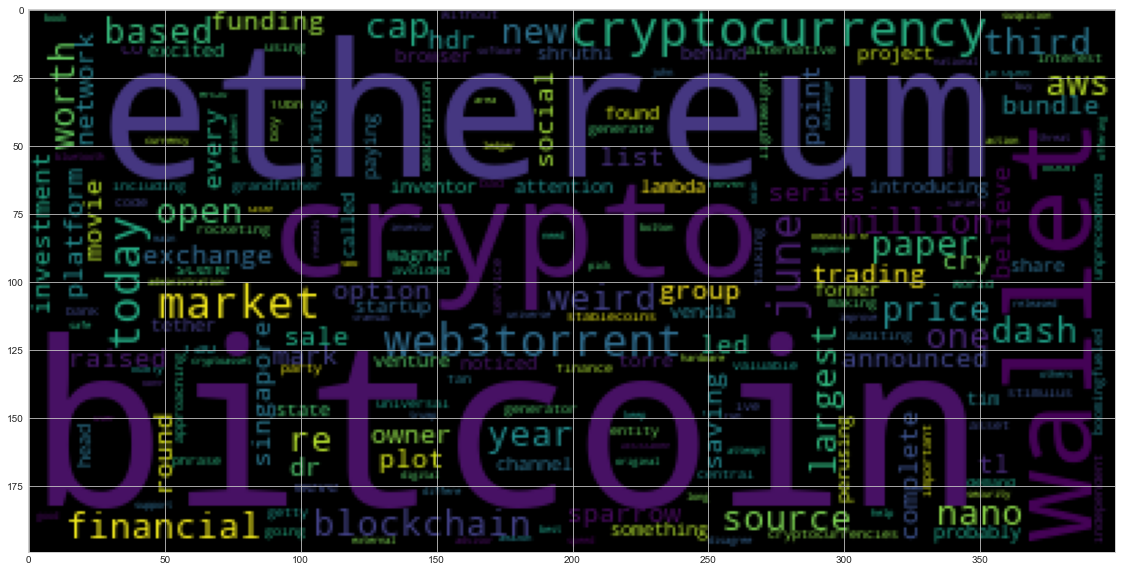

In [76]:
wc = WordCloud().generate(big_string)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [79]:
import spacy
from spacy import displacy

In [80]:
nlp = spacy.load("en_core_web_sm")

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

## Bitcoin NER

In [90]:
big_string_btc = ' '.join(tokens_btc)

In [92]:
doc_btc = nlp(big_string_btc)
displacy.render(doc_btc, style='ent')

In [95]:
for ent in doc_btc.ents:
    print(ent.text, ent.label_)

twitter kingdom GPE
admin panel world ORG
fbi ORG
fbi ORG
one CARDINAL
bitcoin GPE
30-minute TIME
kim kardashian PERSON
west kanye GPE
fbi ORG
million CARDINAL
19.21 MONEY
june 25 DATE
94 CARDINAL
mark z PERSON
yesterday DATE
afp twitter PERSON
earlier week DATE
singapore GPE
today DATE
3.5 million CARDINAL
hdr group ORG
far year DATE
john mcafee PERSON
three year ago date DATE
17 2017 DATE
ec… +3653 ORG
san francisco GPE
joe biden PERSON
wednesday DATE
earlier afternoon TIME
bootlicker PERSON
bitcoin GPE
wednesday evening TIME
6 pm TIME
apple ORG
mac ORG
first ORDINAL
mac ORG
joe biden PERSON
kanye west GPE
bitcoin GPE
wednesday DATE
joe biden PERSON
kim kardashian PERSON
washington reuters ORG
bitcoin GPE
wednesday DATE
september 2020 DATE
30 CARDINAL


---

## Ethereum NER

In [96]:
big_string_eth = ' '.join(tokens_eth)

In [100]:
doc_eth = nlp(big_string_eth)
displacy.render(doc_btc, style='ent')

In [101]:
for ent in doc_eth.ents:
    print(ent.text, ent.label_)

exchange bitcoin ethereum ORG
singapore GPE
today DATE
3.5 million CARDINAL
hdr group ORG
19.21 MONEY
june 25 DATE
94 CARDINAL
mark z PERSON
june 18 DATE
2020 DATE
today DATE
aws lambda PERSON
tim PERSON
today DATE
10bn ORDINAL
third ORDINAL
bitcoin GPE
+3141 GPE
third ORDINAL
one CARDINAL
one CARDINAL
bitcoin GPE
bitcoin GPE
2009 CARDINAL
bitcoin two CARDINAL
+8117 bolton book PERSON
john r. b… PERSON
bitcoin GPE
89.25 CARDINAL
amazon ORG
bitcoin GPE
digital coin ORG
www.ownrwallet.comsigal ORG
u.s. treasury ORG
2018 DATE
year DATE
second ORDINAL
nearly 60 million CARDINAL
june DATE
dune analytics ORG
bitcoin GPE
